In [8]:
import os
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [9]:
def load_data(path, split=0.2):
    images = sorted(glob(os.path.join(path, "images", "*.png")))
    masks = sorted(glob(os.path.join(path, "masks", "*.png")))
    size = int(len(images) * split)
    print(len(images), size)

    train_x, valid_x = train_test_split(images, test_size=size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=size, random_state=42)

    train_x, test_x = train_test_split(train_x, test_size=size, random_state=42)
    train_y, test_y = train_test_split(train_y, test_size=size, random_state=42)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

In [10]:
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = load_data('THP1_Dataset')
train_x, train_y = shuffle(train_x, train_y)

992 198


(256, 256, 3)
(1, 256, 256, 3)


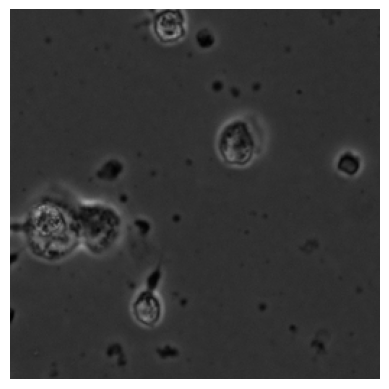

In [22]:

image = cv2.imread(test_x[1])
image_array = np.asarray(image)
print(image_array.shape)
data = np.expand_dims(image_array, axis=0)
print(data.shape)
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


1/1 [==============================] - 0s 178ms/step
[[[[0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   ...
   [0.0000000e+00]
   [0.0000000e+00]
   [6.3937179e-08]]

  [[0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   ...
   [0.0000000e+00]
   [0.0000000e+00]
   [1.0408164e-36]]

  [[0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   ...
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]]

  ...

  [[0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   ...
   [0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]]

  [[0.0000000e+00]
   [0.0000000e+00]
   [0.0000000e+00]
   ...
   [0.0000000e+00]
   [0.0000000e+00]
   [1.7701315e-35]]

  [[2.6545046e-21]
   [6.8209598e-26]
   [4.1707866e-22]
   ...
   [6.3178597e-29]
   [9.2228677e-25]
   [2.5537829e-16]]]]
(256, 256, 1)


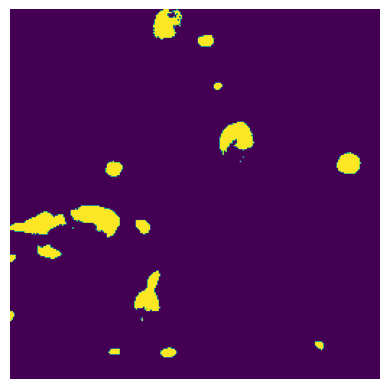

In [25]:
import tensorflow as tf


model = tf.keras.models.load_model('UNET/saved_models/pruned_model_3.h5')
# model = load_model('UNET/saved_models/pruning_model_v2.h5', compile=False)  # Provide the path to your pre-trained model file

predict_test=model.predict(data,verbose=1)

print(predict_test)
print(predict_test[0].shape)

plt.imshow(predict_test[0])
plt.axis('off')  # Hide axes
plt.show()

In [26]:
cv2.imshow("Segmentation Result", predict_test[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
import cv2
import numpy as np
import tensorflow as tf

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="UNET/saved_models/quantize_models/thp1_dataset_v3_15_epochs.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load and prepare input image
input_image = cv2.imread(test_x[1])
input_image = cv2.resize(input_image, (input_details[0]['shape'][2], input_details[0]['shape'][1]))
input_image = input_image.astype(np.float32) / 255.0

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], [input_image])

# Run inference
interpreter.invoke()

# Get segmentation result
output_data = interpreter.get_tensor(output_details[0]['index'])

# Post-process segmentation result (if needed)
segmentation_result = output_data[0]

# Display or save the segmentation result
# For example:
# cv2.imshow("Segmentation Result", segmentation_result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [15]:

cv2.imshow("Segmentation Result", segmentation_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

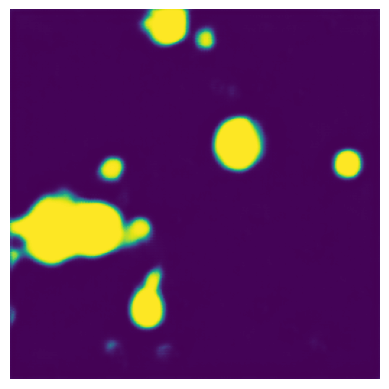

In [16]:
plt.imshow(segmentation_result)
plt.axis('off')  # Hide axes
plt.show()